# The Lorenz system

The Lorenz system is the 3d nonlinear ordinary differential equation

\begin{align*}
\dot{x} &= \sigma(y-x) \\
\dot{y} &= \rho x - y - xz \\
\dot{z} &= xy - \beta z
\end{align*}

where $\sigma, \rho, \beta$ are parameters with commonly used values $\sigma = 10, \beta = 10/3, \rho = 28$ and the dots represent differentiation in time. Edward Lorenz, a geophysicist at MIT, developed these equations in 1963 as a reduced model of thermal convection in a fluid between two flat plates, heated below and cooled above.  

As of 2018-04-27, this notebook is a set of plots meant to accompany a lecture on the chalkboard.

## A look at the Lorenz attractor

Let's integrate and plot trajectories of the Lorenz system at typical $\sigma, \beta, \rho$ values.

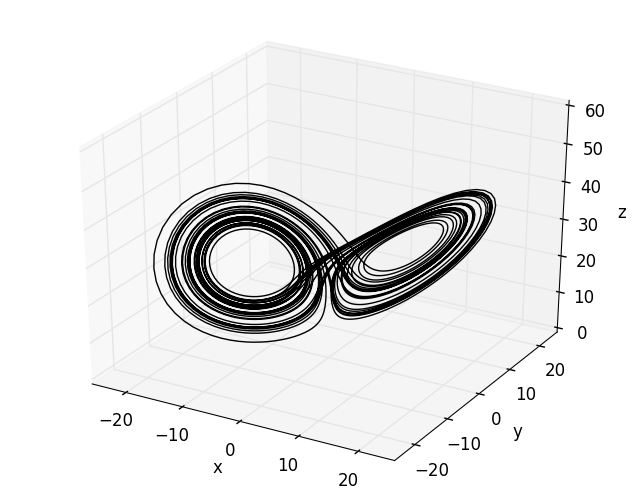

In [2]:
using PyPlot

# define Lorenz equations ẋ = f(x)
function f(x)
    [σ*(x[2]-x[1]); x[1]*(ρ-x[3]) - x[2]; x[1]*x[2] - β*x[3]]
end

σ = 10
β = 8/3
ρ = 28

# define simple 4th-order runge-kutta integrator
function rk4(f, x₀, tspan)
    x = zeros(length(tspan), length(x₀))
    x[1,:] = x₀
    
    for n=1:length(tspan)-1
        xₙ = x[n,:]
        dt = tspan[n+1] - tspan[n]
        k₁ = f(xₙ)
        k₂ = f(xₙ + k₁*dt/2)
        k₃ = f(xₙ + k₂*dt/2)
        k₄ = f(xₙ + k₃*dt)
        x[n+1,:] = xₙ + dt/6 * (k₁ + 2k₂ + 2k₃ + k₄)
    end
    return tspan,x    
end

# integrate ẋ = f(t,x) numerically from t=0 to t=T
T = 40.0
dt = 0.01
x₀ = [-5; 0.2; 30.0]      # an initial condition near attractor
t,x = rk4(f, x₀, 0:dt:T)

# plot trajectory x(t)
plot3D(x[:,1], x[:,2], x[:,3], "k-")
xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;


Plot $x$ versus $z$.

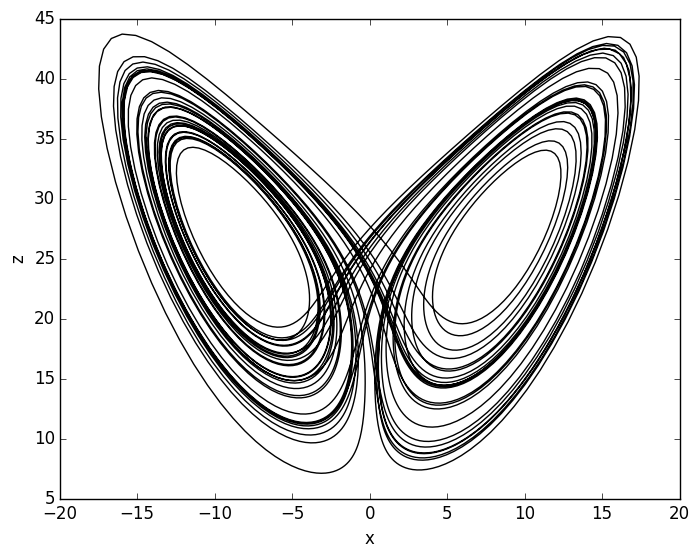

PyObject <matplotlib.text.Text object at 0x7fc7790c72d0>

In [3]:
plot(x[:,1], x[:,3], "k-")
xlabel("x")
ylabel("z")

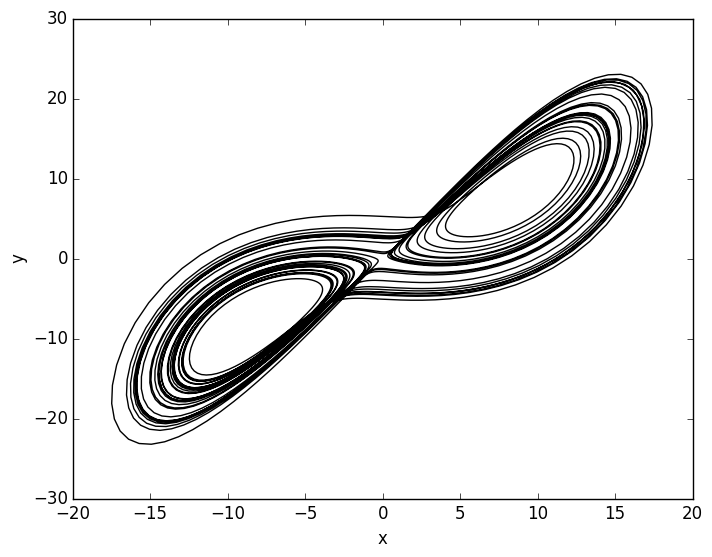

PyObject <matplotlib.text.Text object at 0x7fc77902fad0>

In [4]:
plot(x[:,1], x[:,2], "k-")
xlabel("x")
ylabel("y")

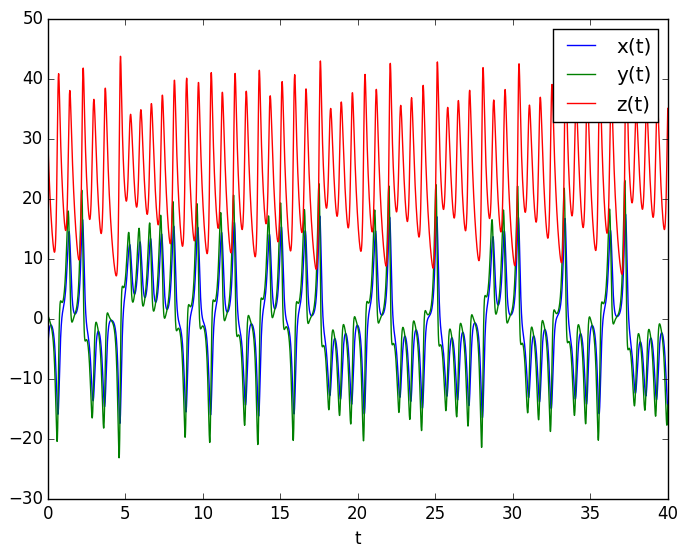

PyObject <matplotlib.text.Text object at 0x7fc779091cd0>

In [5]:
plot(t, x[:,1], "b-", label="x(t)")
plot(t, x[:,2], "g-", label="y(t)")
plot(t, x[:,3], "r-", label="z(t)")
legend()
xlabel("t")

## Sensitive dependence on initial conditions

Observe exponential separation of nearby trajectories

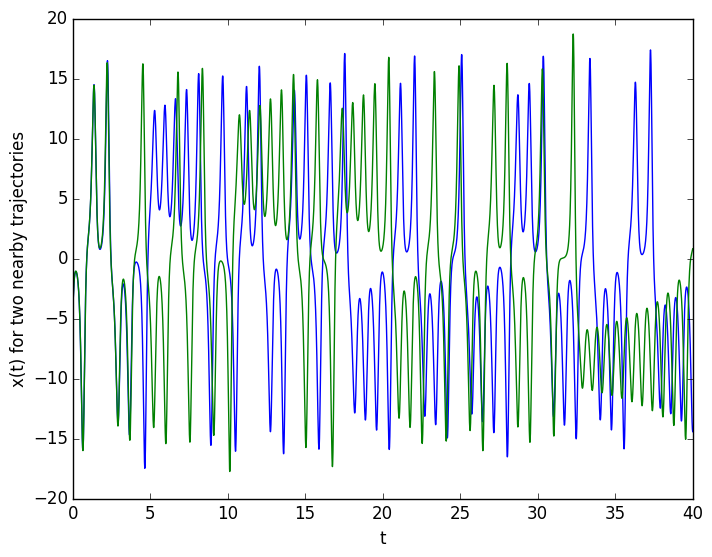

PyObject <matplotlib.text.Text object at 0x7fc774d72050>

In [9]:
# integrate and plot two trajectories starting from nearby points
x₀ = [-5; 0.2; 30.0]
ϵ  = [0.1; 0.0; 0.0]

t1,x1 = rk4(f, x₀, t)
t2,x2 = rk4(f, x₀+ϵ, t);
plot(t1, x1[:,1], "b-")
plot(t2, x2[:,1], "g-")
xlabel("t")
ylabel("x(t) for two nearby trajectories")

### Exponential growth in separation of nearby trajectories

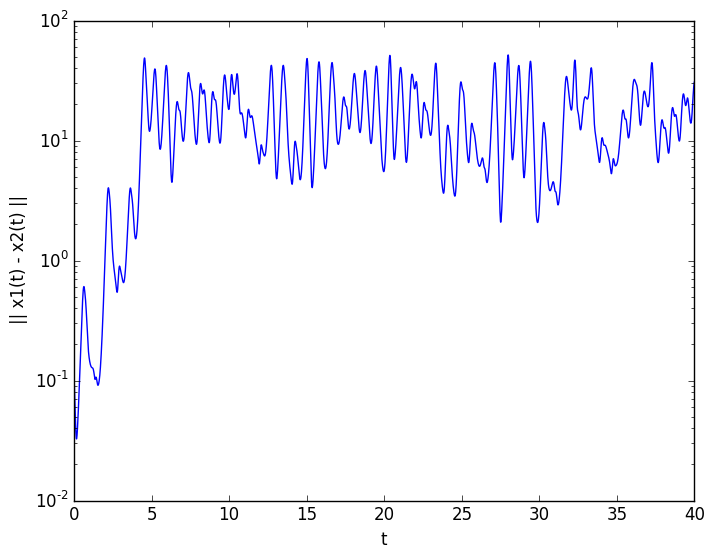

PyObject <matplotlib.text.Text object at 0x7fc774cc3cd0>

In [10]:
diff = x1-x2;
separation = sqrt.((diff[:,1]).^2 + (diff[:,2]).^2 + diff[:,3].^2)
semilogy(t1, separation, "b-")
xlabel("t")
ylabel("|| x1(t) - x2(t) ||")

## Equilibria

The Lorenz system has equilibria at $x = (0,0,0)$ and $(\pm \sqrt{\beta(\rho-1)}, \pm \sqrt{\beta(\rho-1)}, \rho-1)$. For these points, $\dot{x} = f(x) = 0$.

In [11]:
f([0; 0; 0])

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [12]:
f([sqrt(β*(ρ-1)); sqrt(β*(ρ-1)); ρ-1])

3-element Array{Float64,1}:
  0.0        
  0.0        
 -1.42109e-14

Observe where equilibria are relative to attractor.

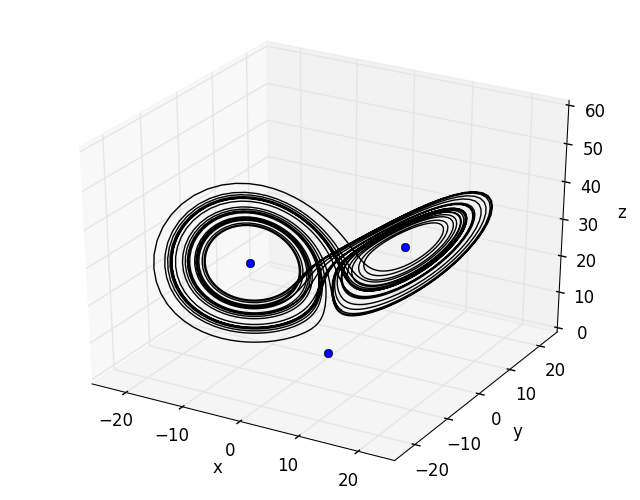

In [14]:
# integrate ẋ = f(t,x) numerically from t=0 to t=T
T = 30.0
dt = 0.01
x₀ = [-5; 0.2; 30.0] # near attractor
#x₀ = [1; 1; 0.0]
t,x = rk4(f, x₀, 0:dt:T)

# plot trajectory x(t)
plot3D(x[:,1], x[:,2], x[:,3], "k-")
xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;

# equilibria
eqb1 = [0; 0; 0]
eqb2 = [ sqrt(β*(ρ-1));  sqrt(β*(ρ-1)); ρ-1]
eqb3 = [-sqrt(β*(ρ-1)); -sqrt(β*(ρ-1)); ρ-1]

eqbs = zeros(3,3)
eqbs[1,:] = eqb1
eqbs[2,:] = eqb2
eqbs[3,:] = eqb3
plot3D(eqbs[:,1], eqbs[:,2], eqbs[:,3], "bo");


## Linear stability analysis near equilibrium at origin

Near equilibrium points $x^*$, small perturbations $x(t) = x^* + \Delta x(t)$ evolve according to the linearized dynamics

\begin{align*}
\Delta \dot{x} = Df \Delta x
\end{align*}

where $Df$ is the matrix of partial derviatives of $f(x)$. 

In [15]:
# matrix of partial derivatives at point x
function Df(x)
    [ -σ      σ    0; 
     ρ-x[3]  -1  -x[1];
     x[2]   x[1]  -β]
end

Df (generic function with 1 method)

At the origin equilibrium, the matrix of partial derivatives is

In [17]:
Df([0;0;0])

3×3 Array{Float64,2}:
 -10.0  10.0   0.0    
  28.0  -1.0   0.0    
   0.0   0.0  -2.66667

The dynamics of the linear system $\Delta \dot{x} = Df \Delta x$ are characterized by the eigenvalues and eigenvectors of $Df$. Compute these.

In [22]:
λ,V = eig(Df([0;0;0]));
@show λ

λ = [-22.8277, 11.8277, -2.66667]


3-element Array{Float64,1}:
 -22.8277 
  11.8277 
  -2.66667

In [23]:
@show V[:,1]
@show V[:,2]
@show V[:,3];

V[:, 1] = [-0.614817, 0.78867, 0.0]
V[:, 2] = [-0.416504, -0.909134, 0.0]
V[:, 3] = [0.0, 0.0, 1.0]


Integrate small perturbations along the eigenvectors.

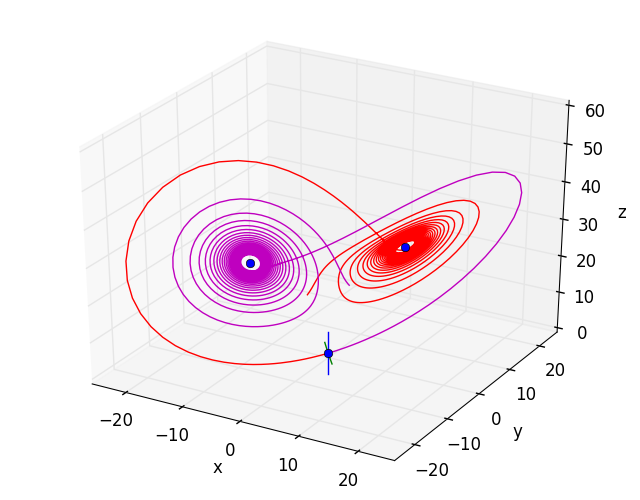

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7fc772fa0ed0>

In [54]:
attractor = x # previously computed
#plot3D(attractor[:,1], attractor[:,2], attractor[:,3], "k-")

# integrate perturbation in stable manifold of eqb1, along V[:,3]
t, xstable   = rk4(f, eqb1+6*V[:,3], 0:dt:10)
plot3D(xstable[:,1], xstable[:,2], xstable[:,3], "b-")

t, xstable   = rk4(f, eqb1-6*V[:,3], 0:dt:10)
plot3D(xstable[:,1], xstable[:,2], xstable[:,3], "b-")

# integrate perturbation in stable manifold of eqb1: along ±V[:,1]
t, xstable   = rk4(f, eqb1+4*V[:,1], 0:dt:.1)
plot3D(xstable[:,1], xstable[:,2], xstable[:,3], "g-")

t, xstable   = rk4(f, eqb1-4*V[:,1], 0:dt:.1)
plot3D(xstable[:,1], xstable[:,2], xstable[:,3], "g-")


# integrate perturbations in unstable manifold of eqb1, along ±V[:,2]
# Try T=0.3, 1, 4, 8, 16,17,18
T=17
t, xunstable = rk4(f, eqb1+0.1*V[:,2], 0:dt:T)
plot3D(xunstable[:,1], xunstable[:,2], xunstable[:,3], "r-")

t, xunstable = rk4(f, eqb1-0.1*V[:,2], 0:dt:T)
plot3D(xunstable[:,1], xunstable[:,2], xunstable[:,3], "m-")


xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;

eqb1 = [0; 0; 0]
eqb2 = [ sqrt(β*(ρ-1));  sqrt(β*(ρ-1)); ρ-1]
eqb3 = [-sqrt(β*(ρ-1)); -sqrt(β*(ρ-1)); ρ-1]

eqbs = zeros(3,3)
eqbs[1,:] = eqb1
eqbs[2,:] = eqb2
eqbs[3,:] = eqb3
plot3D(eqbs[:,1], eqbs[:,2], eqbs[:,3], "bo")


In [ ]:
Df(eqb2)

In [ ]:
λ, V = eig(Df(eqb2))
@show λ;